In [280]:
import pandas as pd
import numpy as np

In [332]:
data_train = pd.read_csv('sources/train.csv')
data_test = pd.read_csv('sources/test2.csv')

In [333]:
data_train.head(5)
data_test.head(5)

,1,2,3,4,5,6
0,-0.377,-0.158,0.035,0.172,0.228,0.402
1,-0.377,-0.158,0.035,0.172,0.228,0.421
2,-0.377,-0.158,0.035,0.172,0.228,0.436
3,-0.377,-0.158,0.035,0.172,0.228,0.464
4,-0.377,-0.158,0.035,0.172,0.228,0.479


In [334]:
X_ = data_train.drop(['Y'], axis='columns').values
y = data_train['Y'].values

X_test = data_test.values


In [335]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)
X_test = ss.transform(X_test)


In [336]:
def calculation_classes(y, y_test = None):
    print ('\t\tTRAIN DATA\tTEST DATA')
    print ('Negative\t', np.sum(y==0),'  ',
           round(100*np.sum(y==0)/y.shape[0],2),'%',
           '\t',np.sum(y_test==0),'  ',
           round(100*np.sum(y_test==0)/y_test.shape[0],2),'%'
           '\nPositive\t ', np.sum(y==1),' ',
           round(100*np.sum(y==1)/y.shape[0],2),'%'
           '\t',np.sum(y_test==1),' ',
           round(100*np.sum(y_test==1)/y_test.shape[0],2),'%'
      )

In [337]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Матрица ошибок')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()


In [338]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, recall_score

In [288]:
'''X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True,\
                                                    test_size=0.1)

print('Initial data')
calculation_classes(y_train,y_test)

dtc = tree.DecisionTreeClassifier(random_state=228, max_depth =7)
dtc = dtc.fit(X_train, y_train)

predictions = dtc.predict(X_train)
cm = confusion_matrix(y_train, predictions)
predictions = dtc.predict(X_test)
cm2 = confusion_matrix(y_test, predictions)

'''

"X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True,                                                    test_size=0.1)\n\nprint('Initial data')\ncalculation_classes(y_train,y_test)\n\ndtc = tree.DecisionTreeClassifier(random_state=228, max_depth =7)\ndtc = dtc.fit(X_train, y_train)\n\npredictions = dtc.predict(X_train)\ncm = confusion_matrix(y_train, predictions)\npredictions = dtc.predict(X_test)\ncm2 = confusion_matrix(y_test, predictions)\n\n"

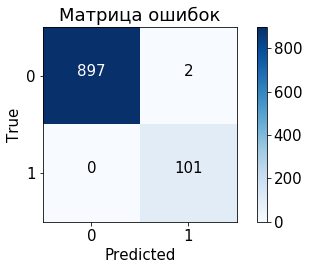

In [205]:
plot_confusion_matrix(cm, ['0', '1'])


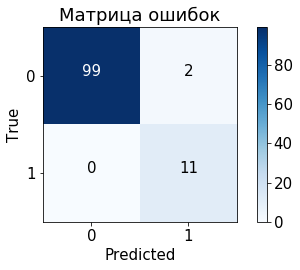

In [206]:
plot_confusion_matrix(cm2, ['0', '1'])

# Decision Tree Classifier

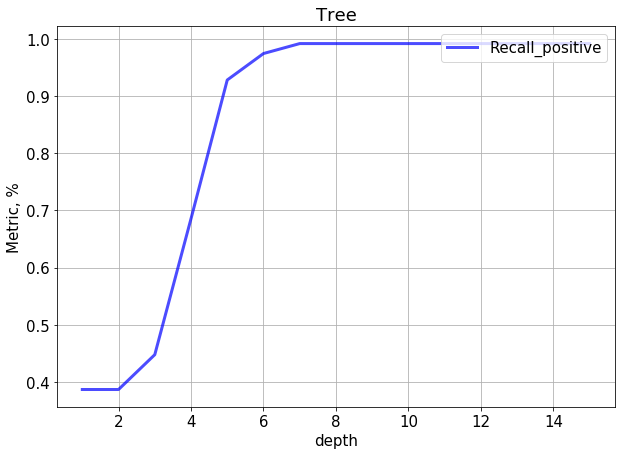

In [339]:
max_depth = 15

x_axis = np.linspace(1, max_depth, num=max_depth)
plt.figure(figsize=(10, 7))

y_rec_pos = np.zeros(x_axis.shape)

for n in range(max_depth):
    dtc = tree.DecisionTreeClassifier(random_state=228, max_depth = n+1)
    y_rec_pos[n] = cross_val_score(dtc, X, y, scoring='recall',cv =5).mean()
    
plt.plot(x_axis, y_rec_pos, color='b', lw=3, alpha=0.7, label='Recall_positive')
plt.title('Tree')
plt.xlabel('depth')
plt.ylabel('Metric, %')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [340]:
max_depth = 7

In [341]:
dtc_finall = tree.DecisionTreeClassifier(random_state=228, max_depth=max_depth)
dtc_finall = dtc_finall.fit(X, y)


predictions = dtc_finall.predict(X_test)
index = np.where(predictions == 1)
print(index[0].shape)
print(index)

(459176,)
(array([     0,      1,      2, ..., 697322, 697323, 697324]),)


# Random Forest

In [342]:
from sklearn.ensemble import RandomForestClassifier

In [343]:
max_depth = 64
n_estimators = 10


def find_params_RandomForest(depth, estim):
    recall_max = 0
    for d in range(depth):
        for n in range(estim):
            dtc = RandomForestClassifier(n_estimators=n+1, max_depth=d+1, random_state=228)
            recall = cross_val_score(dtc, X, y, scoring='recall',cv =5).mean()
            
            if recall > recall_max:
                recall_max = recall
                params = [n+1,d+1]
                
    print(recall_max, params)
    return params


In [310]:
params = find_params_RandomForest(15,32)

0.9652173913043478 [3, 6]


In [344]:
rf = RandomForestClassifier(n_estimators=params[0], max_depth=params[1], random_state=228)
rf = rf.fit(X, y)

index = np.where(predictions == 1)
print(predictions.shape)

print(index[0].shape)
print(index)
print(X_test[29])

(697340,)
(459176,)
(array([     0,      1,      2, ..., 697322, 697323, 697324]),)
[-0.377 -0.158  0.035  0.172  0.298  0.317]
